this notebook is only for tesla data for checking

In [7]:
import pandas as pd
import os

processed_dir = "../data/processed"

# Load TSLA first (you can change ticker later)
tsla_path = os.path.join(processed_dir, "TSLA_clean.parquet")

df = pd.read_parquet(tsla_path)

df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-11-25 05:00:00,360.140015,361.929993,338.200012,338.589996,95890900,0.0,0.0
1,2024-11-26 05:00:00,341.000000,346.959991,335.660004,338.230011,62295900,0.0,0.0
2,2024-11-27 05:00:00,341.799988,342.549988,326.589996,332.890015,57896400,0.0,0.0
3,2024-11-29 05:00:00,336.079987,345.450012,334.649994,345.160004,37167600,0.0,0.0
4,2024-12-02 05:00:00,352.380005,360.000000,351.149994,357.089996,77986500,0.0,0.0


In [3]:
!pip install pyarrow


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip uninstall pyarrow -y
!pip install fastparquet

Found existing installation: pyarrow 16.1.0
Uninstalling pyarrow-16.1.0:
  Successfully uninstalled pyarrow-16.1.0
   ---------------------------------------- 0.0/673.3 kB ? eta -:--:--
   ---------------------------------------- 673.3/673.3 kB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00

   ---------------------------------------- 2/2 [fastparquet]




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          250 non-null    object 
 1   Open          250 non-null    float64
 2   High          250 non-null    float64
 3   Low           250 non-null    float64
 4   Close         250 non-null    float64
 5   Volume        250 non-null    int64  
 6   Dividends     250 non-null    float64
 7   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.0,250.0
mean,351.789399,359.815879,343.051521,351.616759,9.892847e+07,0.0,0.0
std,65.465511,65.826083,64.203809,64.981403,3.426987e+07,0.0,0.0
min,223.779999,230.100006,214.250000,221.860001,3.716760e+07,0.0,0.0
25%,308.792496,312.860008,301.057503,308.614990,7.654982e+07,0.0,0.0
50%,344.964996,349.449997,334.875000,342.389999,9.343285e+07,0.0,0.0
75%,414.597504,424.375000,402.417496,410.897491,1.133683e+08,0.0,0.0
max,475.899994,488.540009,457.510010,479.859985,2.874998e+08,0.0,0.0


In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-25 05:00:00,360.140015,361.929993,338.200012,338.589996,95890900,0.0,0.0
2024-11-26 05:00:00,341.000000,346.959991,335.660004,338.230011,62295900,0.0,0.0
2024-11-27 05:00:00,341.799988,342.549988,326.589996,332.890015,57896400,0.0,0.0
2024-11-29 05:00:00,336.079987,345.450012,334.649994,345.160004,37167600,0.0,0.0
2024-12-02 05:00:00,352.380005,360.000000,351.149994,357.089996,77986500,0.0,0.0


Price Trend Over Time

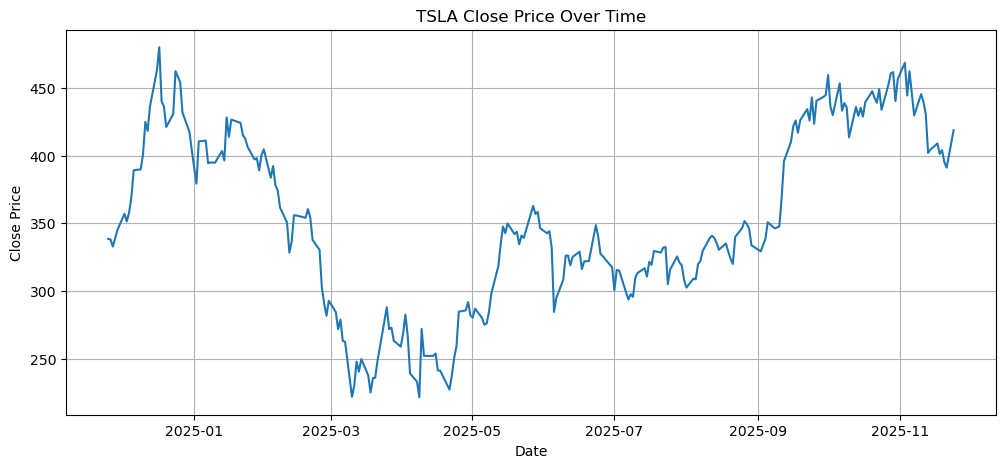

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"])
plt.title("TSLA Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


Volume Trend

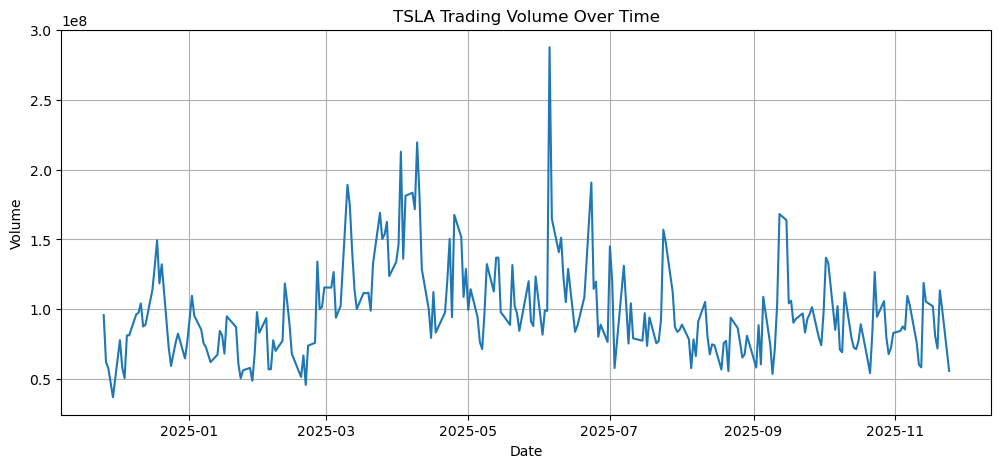

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Volume"])
plt.title("TSLA Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


Close Price + Moving Averages

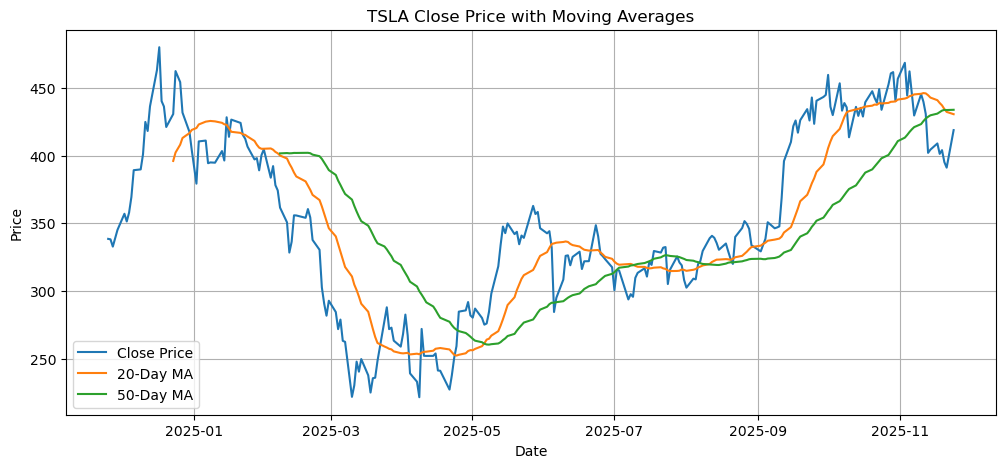

In [12]:
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="Close Price")
plt.plot(df.index, df["MA20"], label="20-Day MA")
plt.plot(df.index, df["MA50"], label="50-Day MA")
plt.title("TSLA Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Testing all the datasets


In [1]:
import pandas as pd

df_feat = pd.read_parquet("../data/processed/TSLA_features.parquet")
df_feat.head(10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,LogReturn,Lag1,...,VolMA5,VolMA10,VolMA20,RSI14,EMA12,EMA26,MACD,Signal,MACD_Hist,Target
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-25 00:00:00-05:00,360.140015,361.929993,338.200012,338.589996,95890900,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,338.589996,338.589996,0.000000,0.000000,0.000000,338.230011
2024-11-26 00:00:00-05:00,341.000000,346.959991,335.660004,338.230011,62295900,0.0,0.0,-0.001063,-0.001064,338.589996,...,NaN,NaN,NaN,NaN,338.534614,338.563331,-0.028717,-0.005743,-0.022973,332.890015
2024-11-27 00:00:00-05:00,341.799988,342.549988,326.589996,332.890015,57896400,0.0,0.0,-0.015788,-0.015914,338.230011,...,NaN,NaN,NaN,NaN,337.666214,338.143085,-0.476871,-0.099969,-0.376902,345.160004
2024-11-29 00:00:00-05:00,336.079987,345.450012,334.649994,345.160004,37167600,0.0,0.0,0.036859,0.036196,332.890015,...,NaN,NaN,NaN,NaN,338.819105,338.662857,0.156248,-0.048726,0.204973,357.089996
2024-12-02 00:00:00-05:00,352.380005,360.000000,351.149994,357.089996,77986500,0.0,0.0,0.034564,0.033980,345.160004,...,66247460.0,NaN,NaN,NaN,341.630011,340.027830,1.602181,0.281456,1.320725,351.420013
2024-12-03 00:00:00-05:00,351.799988,355.690002,348.200012,351.420013,58267200,0.0,0.0,-0.015878,-0.016006,357.089996,...,58722720.0,NaN,NaN,NaN,343.136165,340.871696,2.264470,0.678059,1.586411,357.929993
2024-12-04 00:00:00-05:00,353.000000,358.100006,348.600006,357.929993,50810900,0.0,0.0,0.018525,0.018355,351.420013,...,56425720.0,NaN,NaN,NaN,345.412139,342.135273,3.276866,1.197820,2.079046,369.489990
2024-12-05 00:00:00-05:00,359.869995,375.429993,359.500000,369.489990,81403600,0.0,0.0,0.032297,0.031786,357.929993,...,61127160.0,NaN,NaN,NaN,349.116424,344.161548,4.954875,1.949231,3.005644,389.220001
2024-12-06 00:00:00-05:00,377.420013,389.489990,370.799988,389.220001,81455800,0.0,0.0,0.053398,0.052021,369.489990,...,69984800.0,NaN,NaN,NaN,355.286205,347.499212,7.786993,3.116783,4.670210,389.790009


In [2]:
df_feat = pd.read_parquet("../data/processed/TSLA_features.parquet")
df_feat.tail(10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,LogReturn,Lag1,...,VolMA5,VolMA10,VolMA20,RSI14,EMA12,EMA26,MACD,Signal,MACD_Hist,Target
Date,,,,,,,,,,,,,,,,,,,,,
2025-11-11 00:00:00-05:00,439.399994,442.489990,432.359985,439.619995,60533200,0.0,0.0,-0.012600,-0.012680,445.230011,...,87143300.0,83163550.0,83968035.00,50.163702,445.778838,440.433809,5.345028,8.587747,-3.242718,430.600006
2025-11-12 00:00:00-05:00,442.149994,442.329987,426.559998,430.600006,58513500,0.0,0.0,-0.020518,-0.020731,439.619995,...,81731400.0,82216550.0,83315800.00,45.347777,443.443633,439.705379,3.738253,7.617848,-3.879595,401.989990
2025-11-13 00:00:00-05:00,423.130005,424.500000,396.339996,401.989990,118948000,0.0,0.0,-0.066442,-0.068752,430.600006,...,83596420.0,86866560.0,85403705.00,42.477120,437.066149,436.911647,0.154503,6.125179,-5.970677,404.350006
2025-11-14 00:00:00-05:00,386.299988,412.190002,382.779999,404.350006,105506700,0.0,0.0,0.005871,0.005854,401.989990,...,84003460.0,89103650.0,86212460.00,37.645851,432.032897,434.499673,-2.466777,4.406788,-6.873565,408.920013
2025-11-17 00:00:00-05:00,398.739990,423.959991,398.739990,408.920013,102214300,0.0,0.0,0.011302,0.011239,404.350006,...,89143140.0,90865560.0,88137225.00,36.483598,428.477068,432.604884,-4.127815,2.699867,-6.827683,401.250000
2025-11-18 00:00:00-05:00,405.380005,408.899994,393.709991,401.250000,80688600,0.0,0.0,-0.018757,-0.018935,408.920013,...,93174220.0,90158760.0,89451045.00,34.759740,424.288289,430.282300,-5.994011,0.961092,-6.955103,403.989990
2025-11-19 00:00:00-05:00,406.179993,411.779999,398.500000,403.989990,72047700,0.0,0.0,0.006829,0.006805,401.250000,...,95881060.0,88806230.0,88852255.00,39.915097,421.165473,428.334721,-7.169248,-0.664976,-6.504272,395.230011
2025-11-20 00:00:00-05:00,414.630005,428.940002,394.739990,395.230011,113548800,0.0,0.0,-0.021684,-0.021922,403.989990,...,94801220.0,89198820.0,88194205.00,32.101801,417.175402,425.882521,-8.707118,-2.273405,-6.433714,391.089996
2025-11-21 00:00:00-05:00,402.320007,402.799988,383.760010,391.089996,100180500,0.0,0.0,-0.010475,-0.010530,395.230011,...,93735980.0,88869720.0,88466840.00,26.390087,413.162263,423.305297,-10.143034,-3.847330,-6.295703,418.759888


In [3]:
df_ml = pd.read_parquet("../data/processed/TSLA_ml.parquet")
df_ml.head(), df_ml.tail()


(                                 Open        High         Low       Close  \
 Date                                                                        
 2024-12-24 00:00:00-05:00  435.899994  462.779999  435.140015  462.279999   
 2024-12-26 00:00:00-05:00  465.160004  465.329987  451.019989  454.130005   
 2024-12-27 00:00:00-05:00  449.519989  450.000000  426.500000  431.660004   
 2024-12-30 00:00:00-05:00  419.399994  427.000000  415.750000  417.410004   
 2024-12-31 00:00:00-05:00  423.790009  427.929993  402.540009  403.839996   
 
                              Volume    Return  LogReturn        Lag1  \
 Date                                                                   
 2024-12-24 00:00:00-05:00  59551800  0.073572   0.070991  430.600006   
 2024-12-26 00:00:00-05:00  76366400 -0.017630  -0.017787  462.279999   
 2024-12-27 00:00:00-05:00  82666800 -0.049479  -0.050745  454.130005   
 2024-12-30 00:00:00-05:00  64941000 -0.033012  -0.033569  431.660004   
 2024-12-31 00